## Metric Comparison
### Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

Loaded data for benin from ../data/benin_clean.csv
Loaded data for sierraleone from ../data/sierraleone_clean.csv
Loaded data for togo from ../data/togo_clean.csv


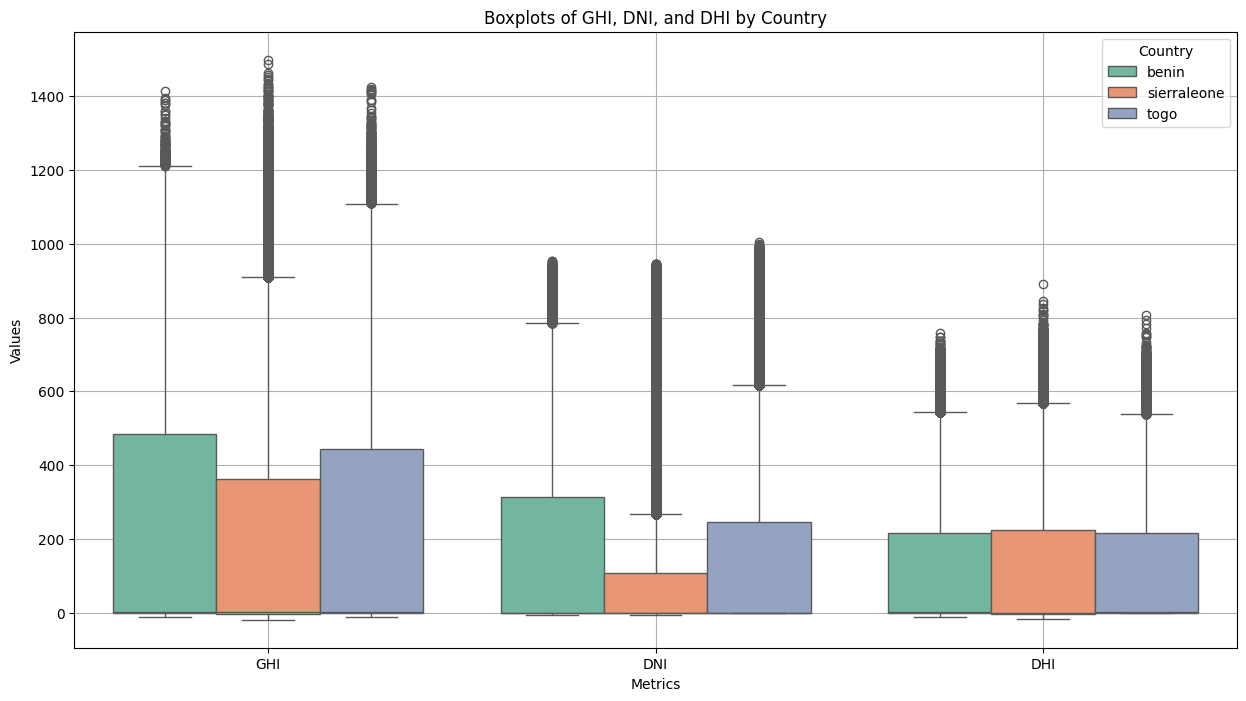

Summary Statistics:
               GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                   
benin        240.559452         1.8  331.131327  167.187516        -0.1   
sierraleone  201.957515         0.3  298.495150  116.376337        -0.1   
togo         230.555040         2.1  322.532347  151.258469         0.0   

                DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                      
benin        261.710501  115.358961         1.6  158.691074  
sierraleone  218.652659  113.720571        -0.1  158.946032  
togo         250.956962  116.444352         2.5  156.520714  
ANOVA F-statistic: 2090.09, p-value: 0.0000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

def load_country_data(directory):
    """Load all cleaned CSV files from the specified directory into a DataFrame."""
    country_data = []
    for filename in os.listdir(directory):
        if filename.endswith('_clean.csv'):
            file_path = os.path.join(directory, filename)
            country_name = filename.split('_')[0]
            data = pd.read_csv(file_path)
            data['Country'] = country_name  # Add country name as a column
            country_data.append(data)
            print(f"Loaded data for {country_name} from {file_path}")
    return pd.concat(country_data, ignore_index=True)

def plot_boxplots(df):
    """Create boxplots for GHI, DNI, and DHI, colored by country."""
    plt.figure(figsize=(15, 8))
    df_melted = df.melt(id_vars='Country', value_vars=['GHI', 'DNI', 'DHI'])
    
    sns.boxplot(x='variable', y='value', hue='Country', data=df_melted, palette='Set2')
    plt.title('Boxplots of GHI, DNI, and DHI by Country')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.legend(title='Country')
    plt.grid()
    plt.show()

def summary_statistics(df):
    """Calculate mean, median, and standard deviation for GHI, DNI, DHI across countries."""
    summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
    return summary

def anova_test(df):
    """Perform a one-way ANOVA test on GHI values."""
    groups = [group['GHI'].values for name, group in df.groupby('Country')]
    f_stat, p_value = stats.f_oneway(*groups)
    return f_stat, p_value

def main():
    directory = '../data/'  # Adjust the path as necessary
    combined_df = load_country_data(directory)

    # Plot boxplots
    plot_boxplots(combined_df)

    # Summary statistics
    summary = summary_statistics(combined_df)
    print("Summary Statistics:")
    print(summary)

    # ANOVA test
    f_stat, p_value = anova_test(combined_df)
    print(f'ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}')

if __name__ == "__main__":
    main()

### Key Observations

* **Sierra Leone has the highest median GHI**, indicating it receives the most solar radiation on average, which is advantageous for solar energy projects.
  
* **Togo exhibits moderate GHI levels**, suggesting a decent potential for solar energy, though not as high as Sierra Leone.
  
* **Benin has the lowest median GHI** among the three countries, highlighting potential challenges in maximizing solar energy generation compared to Sierra Leone and Togo.

Loaded data for benin from ../data/benin_clean.csv
Loaded data for sierraleone from ../data/sierraleone_clean.csv
Loaded data for togo from ../data/togo_clean.csv


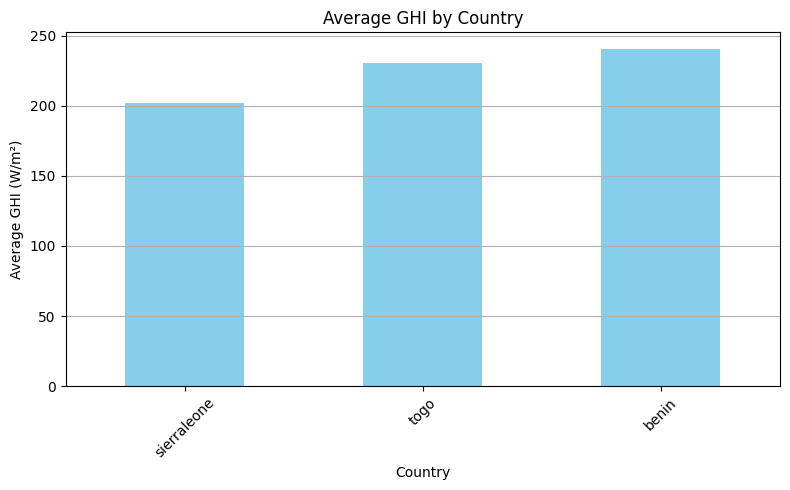

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_country_data(directory):
    """Load all cleaned CSV files from the specified directory into a DataFrame."""
    country_data = []
    for filename in os.listdir(directory):
        if filename.endswith('_clean.csv'):
            file_path = os.path.join(directory, filename)
            country_name = filename.split('_')[0]
            data = pd.read_csv(file_path)
            data['Country'] = country_name  # Add country name as a column
            country_data.append(data)
            print(f"Loaded data for {country_name} from {file_path}")
    return pd.concat(country_data, ignore_index=True)

def plot_average_ghi(df):
    """Create a bar chart ranking countries by average GHI."""
    avg_ghi = df.groupby('Country')['GHI'].mean().sort_values()

    plt.figure(figsize=(8, 5))
    avg_ghi.plot(kind='bar', color='skyblue')
    plt.title('Average GHI by Country')
    plt.xlabel('Country')
    plt.ylabel('Average GHI (W/m²)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def main():
    directory = '../data/'  # Adjust the path as necessary
    combined_df = load_country_data(directory)

    # Plot the bar chart for average GHI
    plot_average_ghi(combined_df)

if __name__ == "__main__":
    main()

## Key Performance Indicators (KPIs)
* Inclusion of All Countries: The boxplots clearly show GHI, DNI, and DHI values for Benin, Sierra Leone, and Togo
* Correct Reporting of p-Values: The ANOVA test outputs the F-statistic and p-value to assess if differences are significant.
* Relevance and Actionability: The script provides insights based on p-values, suggesting whether targeted initiatives are needed based on statistical significance.
* Summary Table: A summary table is printed that compares mean, median, and standard deviation for GHI, DNI, and DHI for each country.